In [2]:
import folium

# Just a barebones map (no GeoPandas needed)
blank_map = folium.Map(
    location=[20, 80],  # Center on India (lat, lon)
    zoom_start=5,       # Adjust zoom level
    tiles="OpenStreetMap"  # Default (others: "Stamen Terrain", "CartoDB positron")
)

# Save to HTML
blank_map.save("blank_basemap.html")

In [4]:
import osmnx as ox

# Configure OSMnx
ox.settings.log_console = True
ox.settings.use_cache = True

# Define the place
place_name = "Fatehpur, Uttar Pradesh, India"

# Get all OSM features within the boundary
try:
    # Modern OSMnx (1.0+)
    gdf = ox.features_from_place(
        place_name,
        tags={
    "building": True,
    "highway": True,
    "waterway": True,
    "amenity": True,
    "landuse": True,
    "natural": True
},  # None means ALL features
    )
    
    # Save to Shapefile (will create .shp, .shx, .dbf files)
    gdf.to_file("fatehpur_all_osm_data.shp", encoding='utf-8')
    print("Successfully saved Fatehpur OSM data to fatehpur_all_osm_data.shp")
    
except Exception as e:
    print(f"Error: {e}")
    print("\nTrying alternative method...")
    
    # Alternative approach if the above fails
    area = ox.geocode_to_gdf(place_name)
    gdf = ox.features_from_polygon(area.geometry.iloc[0], tags=None)
    gdf.to_file("fatehpur_all_osm_data.shp", encoding='utf-8')
    print("Saved using alternative method!")

/tmp/ipykernel_57547/1750482718.py:26: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file("fatehpur_all_osm_data.shp", encoding='utf-8')
/run/media/mayank/53e82406-7352-475e-956c-829701cfe78f/Projects/EV Hardware Project/env/lib/python3.10/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'addr:block' to 'addr_block'
  ogr_write(
/run/media/mayank/53e82406-7352-475e-956c-829701cfe78f/Projects/EV Hardware Project/env/lib/python3.10/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'addr:district' to 'addr_distr'
  ogr_write(
/run/media/mayank/53e82406-7352-475e-956c-829701cfe78f/Projects/EV Hardware Project/env/lib/python3.10/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'addr:state' to 'addr_state'
  ogr_write(
/run/media/mayank/53e82406-7352-475e-956c-829701cfe78f/Projects/EV Hardware Project/env/lib/python3.10/site-packa

Error: Could not add feature to layer at index 86: Attempt to write non-point (POLYGON) geometry to point shapefile.

Trying alternative method...


TypeError: `tags` must be a dict with values of bool, str, or list of str.

In [5]:
import geopandas as gpd
dfg = gpd.read_file("/run/media/mayank/53e82406-7352-475e-956c-829701cfe78f/Projects/EV Hardware Project/fatehpur_all_osm_data.shp")


In [6]:
for x in list(dfg.columns):
    print(x +" ", end="")

element id addr_block addr_distr addr_state addr_subdi amenity descriptio name source addr_full addr_postc natural highway leaf_cycle addr_city contact_ph opening_ho operator_t brand_wiki name_en website religion healthcare addr_stree building contact_he contact_mo brand brand_en currency_I drive_thro indoor note operator operator_e operator_w short_name addr_house cuisine internet_a internet_1 internet_2 outdoor_se phone bus public_tra healthca_1 social_fac social_f_1 waterway name_bn name_gu name_hi name_kn name_ml name_mr name_ta name_uk source_nam name_af name_am name_an name_ar name_as name_az name_be name_bg name_bo name_br name_bs name_ca name_cs name_cy name_da name_de name_dv name_el name_eo name_es name_et name_eu name_fa name_fi name_fr name_ga name_gl name_he name_hr name_hu name_hy name_ia name_id name_is name_it name_ja name_jv name_ka name_kk name_ko name_ku name_la name_lb name_li name_lt name_lv name_mk name_ms name_my name_ne name_nl name_nn name_no name_oc name_or na

In [7]:
columns_of_interest = [
    'name', 'amenity', 'building', 'highway', 'landuse', 
    'addr_city', 'phone',
    'website', 'religion', 'healthcare',
    'shop', 'office', 'cuisine', 'operator', 'geometry'
]


In [8]:
dfg[columns_of_interest].head()

,name,amenity,building,highway,landuse,addr_city,phone,website,religion,healthcare,shop,office,cuisine,operator,geometry
0,Bahua,None,None,bus_stop,None,None,None,None,None,None,None,None,None,None,POINT (80.631 25.84446)
1,lalauli police station,police,None,None,None,None,None,None,None,None,None,None,None,None,POINT (80.54069 25.80995)
2,Lalauli,None,None,bus_stop,None,None,None,None,None,None,None,None,None,None,POINT (80.53896 25.80965)
3,bindki bus stop,bus_station,None,None,None,None,None,None,None,None,None,None,None,None,POINT (80.57983 26.03432)
4,yamuna bridge,police,None,None,None,None,None,None,None,None,None,None,None,None,POINT (80.60686 25.71502)


In [12]:
dfg[['element', 'id', 'addr_block', 'addr_distr', 'addr_state', 'addr_subdi',
       'amenity', 'descriptio', 'name', 'source',
       ...
       'access', 'service', 'bridge_str', 'motor_vehi', 'product', 'office',
       'shop', 'height', 'type', 'geometry']]
dfg.head()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1904060020.py, line 3)

In [10]:
dfg = dfg[["name", "geometry", "amenity"]]

In [11]:
dfg.explore()

In [13]:
dfg

,name,geometry,amenity
0,Bahua,POINT (80.631 25.84446),None
1,lalauli police station,POINT (80.54069 25.80995),police
2,Lalauli,POINT (80.53896 25.80965),None
3,bindki bus stop,POINT (80.57983 26.03432),bus_station
4,yamuna bridge,POINT (80.60686 25.71502),police
...,...,...,...
81,shiva scientific pathology & digital x ray,POINT (80.80377 25.94206),doctors
82,prakash nursingh home,POINT (80.80318 25.94317),social_facility
83,DK Diabetes care center,POINT (80.80396 25.94154),hospital
84,naina dance academy fatehpur,POINT (80.80392 25.93779),dancing_school


In [14]:
dfg["amenity"].unique()

array([None, 'police', 'bus_station', 'drinking_water',
       'charging_station', 'blood_bank', 'clinic', 'hospital', 'atm',
       'bank', 'pharmacy', 'place_of_worship', 'restaurant', 'courthouse',
       'library', 'doctors', 'photo_booth', 'car_wash', 'post_office',
       'social_facility', 'events_venue', 'driving_school',
       'dancing_school', 'school'], dtype=object)

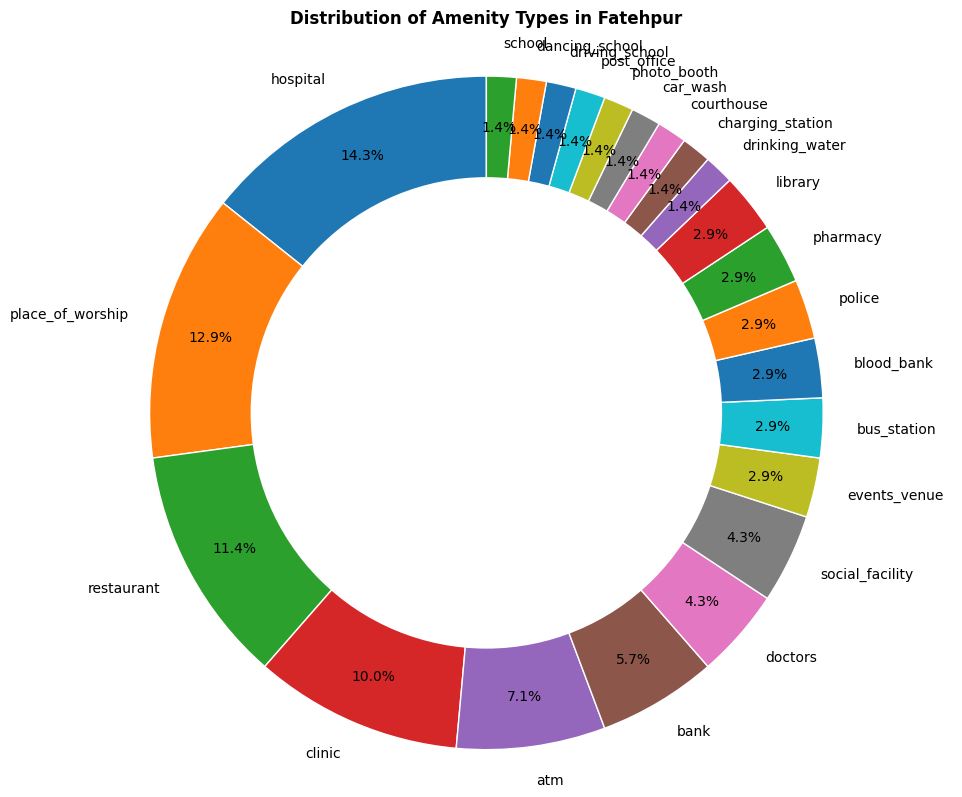

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'dfg'
# Count occurrences of each amenity type
amenity_counts = dfg['amenity'].value_counts()

# Plotting
plt.figure(figsize=(10, 8))
plt.pie(amenity_counts, 
        labels=amenity_counts.index, 
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1})

# Draw circle to make it a donut chart (optional)
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures pie is drawn as circle
plt.axis('equal')  
plt.title('Distribution of Amenity Types in Fatehpur', pad=20, fontweight='bold')

# Show plot
plt.tight_layout()
plt.show()

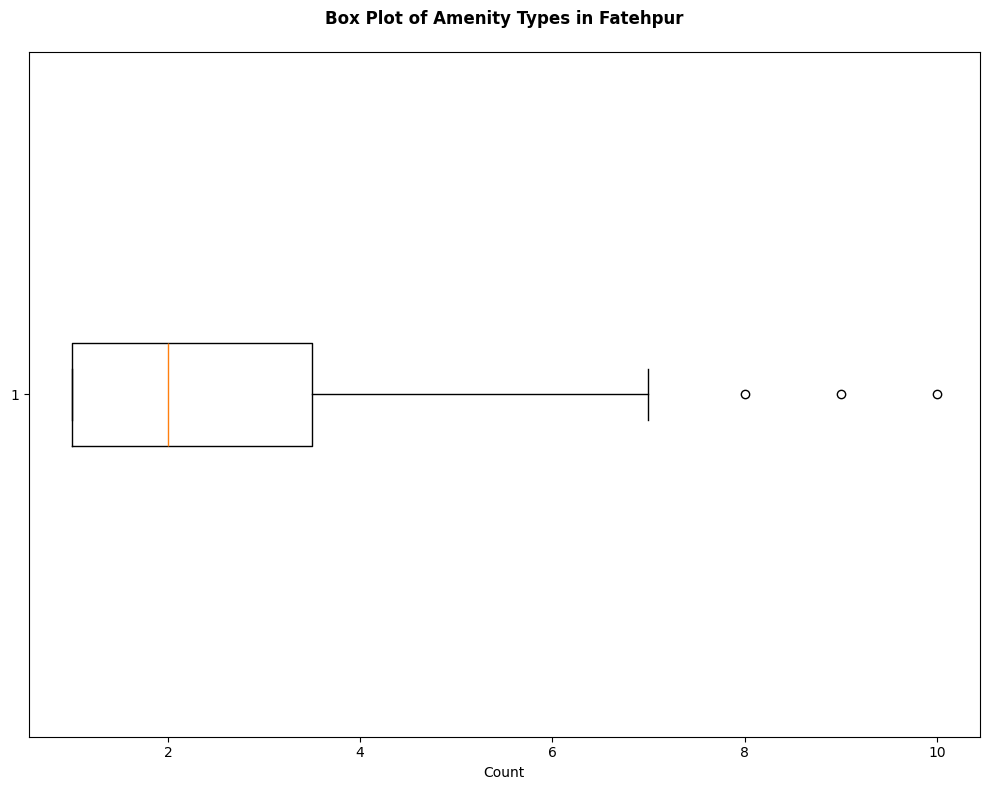

In [19]:
plt.figure(figsize=(10, 8))
plt.boxplot(amenity_counts.values, vert=False)
plt.xlabel('Count')
plt.title('Box Plot of Amenity Types in Fatehpur', pad=20, fontweight='bold')
plt.tight_layout()
plt.show()

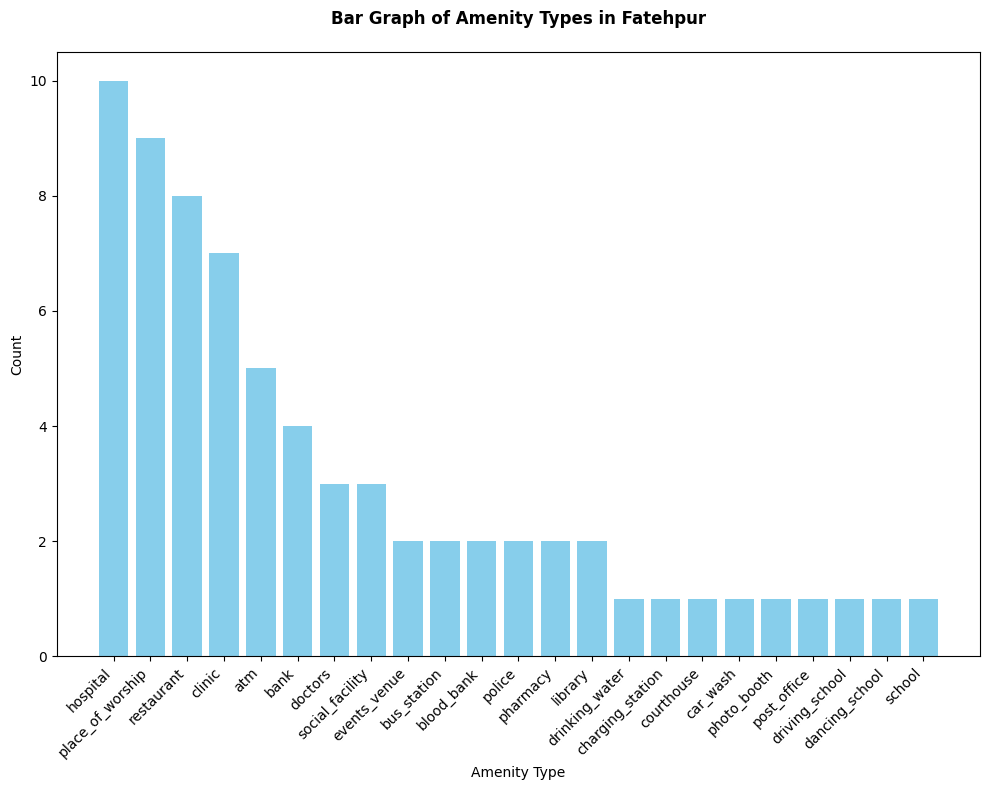

In [18]:
plt.figure(figsize=(10, 8))
plt.bar(amenity_counts.index, amenity_counts.values, color='skyblue')
plt.xlabel('Amenity Type')
plt.ylabel('Count')
plt.title('Bar Graph of Amenity Types in Fatehpur', pad=20, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()